In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical ## for one-hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ## for fully connected
from tensorflow.keras.optimizers import SGD

調整過程
1. 調整learning rate=0.01、調整epoch=100 -> accuracy達0.9792
2. 把第一層hidden layer的參數調成200 -> accuracy達0.992

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
n = 9487

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

1

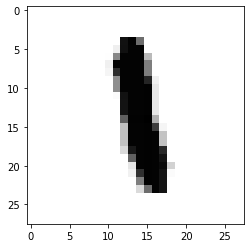

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
# 拉平
# /255? 把數字調至0-1之間
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
# 10個類別
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [ ]:
model = Sequential()

In [ ]:
# Dense也可改成CNN、RNN
# 激發函數通常用一樣
model.add(Dense(200, input_dim=784, activation='relu'))

In [ ]:
model.add(Dense(100, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), 
              metrics=['accuracy'])

#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_12 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 112,920
Trainable params: 112,920
Non-trainable params: 0
________________________________________________

### 5. step 2: 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 0.0883 - accuracy: 0.3510
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9774
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9779
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9770
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9787
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9779
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9786
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9791
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9802
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0035 - accura

### 6. step 3: 預測 (testing)

In [ ]:
predict = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


神經網路預測是: 6


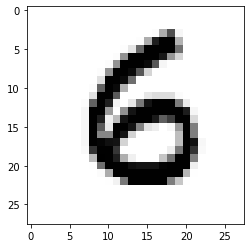

In [ ]:
n = 446

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [ ]:
model.save("my_nn.h5")